$$
F_{dry}=0.5+\frac{\arctan \left[e p d r y\left(S_w-f m d r y\right)\right]}{\pi}
$$

$$
F_{oil}=\left\{\begin{array}{cc}
1 & S_{\text {or }} \leq S_o \leq \text { floil } \\
\left(\frac{\text { fmoil }-S_o}{\text { fmoil }- \text { floil }}\right)^{\text {epoil }} & \text { floil }<S_o<\text { fmoil } \\
0 & \text { fmoil } \leq S_o \leq S_{w c}-S_{g r}
\end{array}\right.
$$

$$
f_{\alpha} = \frac{\frac{k_{r\alpha}}{\mu_\alpha}}{\frac{k_{rw}}{\mu_{w}} + \frac{k_{ro}}{\mu_{o}} + \frac{k_{rg}}{\mu_{g}}},
\qquad
\mu_{app} = \frac{1}{\frac{k_{rw}}{\mu_{w}} + \frac{k_{ro}}{\mu_{o}} + \frac{k_{rg}}{MRF \mu_{g}}}
$$

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# set latex font
plt.rc('font', family='serif')

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

seed = 93
np.random.seed(seed)

def prod(x):
    p = 1
    for i in x:
        p *= i
    return p

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Lyu et al. (2022) Data Params

<!-- @article{lyu2021simulation,
  title = {Simulation of {{Foam Enhanced-Oil-Recovery Processes Using Operator-Based Linearization Approach}}},
  author = {Lyu, Xiaocong and Voskov, Denis and Tang, Jinyu and Rossen, William R.},
  year = {2021},
  month = aug,
  journal = {SPE Journal},
  volume = {26},
  number = {04},
  pages = {2287--2304},
  issn = {1086-055X},
  doi = {10.2118/205399-PA},
  urldate = {2024-03-24},
  abstract = {Foam injection is a promising enhanced-oil-recovery (EOR) technology that significantly improves the sweep efficiency of gas injection. Simulation of foam/oil displacement in reservoirs is an expensive process for conventional simulation because of the strongly nonlinear physics, such as multiphase flow and transport with oil/foam interactions. In this work, an operator-based linearization (OBL) approach, combined with the representation of foam by an implicit-texture (IT) model with two flow regimes, is extended for the simulation of the foam EOR process. The OBL approach improves the efficiency of the highly nonlinear foam-simulation problem by transforming the discretized nonlinear conservation equations into a quasilinear form using state-dependent operators. The state-dependent operators are approximated by discrete representation on a uniform mesh in parameter space. The numerical-simulation results are validated by using three-phase fractional-flow theory for foam/oil flow. Starting with an initial guess depending on the fitting of steady-state experimental data with oil, the OBL foam model is regressed to experimental observations using a gradient-optimization technique. A series of numerical validation studies is performed to investigate the accuracy of the proposed approach. The numerical model shows good agreement with analytical solutions at different conditions and with different foam parameters. With finer grids, the resolution of the simulation is better, but at the cost of more expensive computations. The foam-quality scan is accurately fitted to steady-state experimental data, except in the low-quality regime. In this regime, the used IT foam model cannot capture the upward-tilting pressure gradient (or apparent viscosity) contours. 1D and 3D simulation results clearly demonstrate two stages of foam propagation from inlet to outlet, as seen in the computed-tomography (CT) coreflood experiments: weak foam displaces most of the oil, followed by a propagation of stronger foam at lower oil saturation. OBL is a direct method to reduce nonlinearity in complex physical problems, which can significantly improve computational performance. Taking its accuracy and efficiency into account, the data-driven OBL-based approach could serve as a platform for efficient numerical upscaling to field-scale applications.}
}
 -->

<span style="color:red">**Not sure which values are used for the relative permeability.**</span>

There is table with an "optimized" set of parameters

In [2]:
abs_perm = 2.783123706e-12 # m^2 |  2.82 Darcy (Tang thesis, Table 6.1)
phi = 0.22  # (Tang thesis, Table 6.1)

sigma = 0.03  # N/m
ut = 1.0583e-5  # m/s   |   3 ft/day

muw = 1.00e-3   # 0.70e-3   (tang2019experimental)
muo = 5.00e-3   # 5.00e-3   (tang2019experimental)
mug = 1.00e-5   # 2.07e-5   (tang2019experimental)


# Table C1
Swc = 0.197     # 0.135     (tang2019experimental)
Sor = 0.103     # 0.100     (tang2019experimental)
Sgr = 0.013     # 0.200     (tang2019experimental)

krw0 = 0.247    # 0.713     (tang2019experimental)
kro0 = 0.584    # 0.500     (tang2019experimental)
krg0 = 0.830    # 0.940     (tang2019experimental)

nw = 3.86       # 2.46      (tang2019experimental)
no = 2.54       # 2.00      (tang2019experimental)
ng = 1.62       # 1.30      (tang2019experimental)

# lyu2021simulation
fmmob = 50_000      # 8.18e5
sfdry = 0.215       # 0.148
sfbet = 19_950      # 2.00e4
fmoil = 0.823
floil = 0.295
epoil = 3.827
fmcap = 0.0001
epcap = 1.321

# # tang2019experimental (C16 hexadecane)
# fmmob = 9.73e4
# sfdry = 0.146
# sfbet = 2e4


# # Table A1 XXX
# Swc, Sor, Sgr     = 0.1, 0.1, 0.0
# krw0, kro0, krg0  = 1.0, 1.0, 1.0
# nw, no, ng        = 2.0, 2.0, 2.0
# fmmob = 2_000
# sfdry = 0.3         # fmdry / SF
# sfbet = 32_000      # epdry
# epoil = 3.0

real = { k: v for k, v in locals().items() if k in ['fmmob', 'sfdry', 'sfbet', 'fmoil', 'floil', 'epoil', 'fmcap', 'epcap'] }

#### Experimental Data from Tang et al. (2019) used by Lyu et al. (2022)

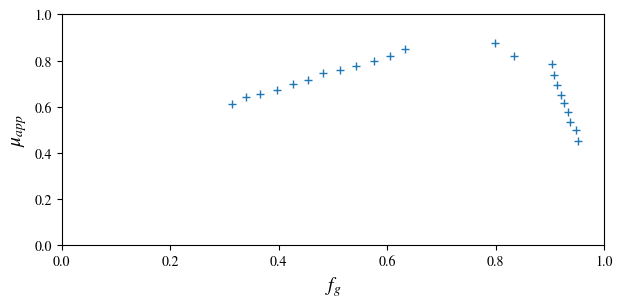

In [3]:
fgmuax = np.array([
    [0.31351869606903165, 0.6133682830930537],
    [0.34036433365292423, 0.6408912188728701],
    [0.36625119846596355, 0.6566186107470511],
    [0.3969319271332694, 0.673656618610747],
    [0.42569511025886864, 0.6998689384010484],
    [0.45349952061361454, 0.7169069462647444],
    [0.48226270373921376, 0.7444298820445608],
    [0.5129434324065196, 0.7614678899082568],
    [0.5417066155321189, 0.7771952817824377],
    [0.5752636625119847, 0.7994757536041939],
    [0.6049856184084371, 0.8217562254259501],
    [0.6337488015340363, 0.8492791612057666],
    [0.7996164908916586, 0.8768020969855831],
    [0.8341323106423777, 0.8217562254259501],
    [0.9031639501438159, 0.783748361730013],
    [0.9079578139980824, 0.7391874180865006],
    [0.9137104506232022, 0.6959370904325033],
    [0.9204218600191754, 0.6513761467889907],
    [0.9252157238734419, 0.618610747051114],
    [0.9338446788111218, 0.5792922673656618],
    [0.9367209971236816, 0.5360419397116645],
    [0.9482262703739214, 0.49803407601572736],
    [0.9511025886864811, 0.45347313237221487]
])

fgmua = fgmuax.copy()

plt.figure(figsize=(7, 3))
plt.plot(*zip(*fgmua), '+')
plt.xlabel(r'$f_g$', fontsize=14)
plt.ylabel(r'$\mu_{app}$', fontsize=14)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [4]:
def foil(so, fmoil, floil, epoil):
    
    if (so > fmoil):
        Fo = 0.0
    elif (so < floil):
        Fo = 1.0
    else:
        Fo = ((fmoil - so)/(fmoil - floil))**epoil
    # Fo[so > fmoil] = 0.0
    # Fo[so < floil] = 1.0

    return Fo

vfoil = np.vectorize(foil)

def fshear(mu_app, fmcap, epcap):
    Nca = (mu_app * ut) / sigma
    return (fmcap / Nca) ** epcap

In [5]:
from scipy import optimize as opt

def fshear_residual(mu_app, mob_w, mob_g, mob_o, sw, so, params):

    Nca = (mu_app * ut) / sigma
    # print(mu_app, Nca)
    
    Fw = 0.5 + np.arctan(params['sfbet'] * (sw - params['sfdry']))/np.pi
    Fo = foil(so, params['fmoil'], params['floil'], params['epoil'])
    if Nca < params["fmcap"]:
        Fs = 1.0
    Fs = (params["fmcap"] / Nca) ** params["epcap"]
    
    # Fs[params["fmcap"] > Nca] = 1.0
    
    mrf = 1.0 + params["fmmob"] * Fw * Fo * Fs
    mob_t = mob_w + mob_o + (mob_g/mrf)
    
    # print(f"mu_app: {mu_app} | approx: {1/mob_t}")

    return np.abs(mu_app - (1.0/mob_t))

def muapp_approx(mob_w, mob_g, mob_o, sw, so, params):
    results = []
    for mw, mg, mo, s_w, s_o in zip(mob_w, mob_g, mob_o, sw, so):
        result = opt.minimize_scalar(
            fshear_residual,
            args=(mw, mg, mo, s_w, s_o, params),
            method='bounded',
            bounds=(1e-6, 10)
        )
        results.append(result.x)

        # # print error commited
        # print(f"mu_app: {result.x:.4f} | error: {result.fun:.4f}")


    return np.array(results)


In [6]:
from scipy import optimize as opt

def fshear_residual(mu_app, mob_w, mob_g, mob_o, sw, so, params):

    Nca = (mu_app * ut) / sigma
    # print(mu_app, Nca)
    
    Fw = 0.5 + np.arctan(params['sfbet'] * (sw - params['sfdry']))/np.pi
    Fo = foil(so, params['fmoil'], params['floil'], params['epoil'])
    if Nca < params["fmcap"]:
        Fs = 1.0
    Fs = (params["fmcap"] / Nca) ** params["epcap"]
    
    # Fs[params["fmcap"] > Nca] = 1.0
    
    mrf = 1.0 + params["fmmob"] * Fw * Fo * Fs
    mob_t = mob_w + mob_o + (mob_g/mrf)
    
    # print(f"mu_app: {mu_app} | approx: {1/mob_t}")

    return np.abs(mu_app - (1.0/mob_t))

def muapp_approx(mob_w, mob_g, mob_o, sw, so, params):
    """ Approximate the apparent viscosity using the shear rate model """
    results = []
    for mw, mg, mo, s_w, s_o in zip(mob_w, mob_g, mob_o, sw, so):
        result = opt.minimize_scalar(
            fshear_residual,
            args=(mw, mg, mo, s_w, s_o, params),
            method='bounded',
            bounds=(1e-6, 10)
        )
        results.append(result.x)

        # # print error commited
        # print(f"mu_app: {result.x:.4f} | error: {result.fun:.4f}")

    return np.array(results)


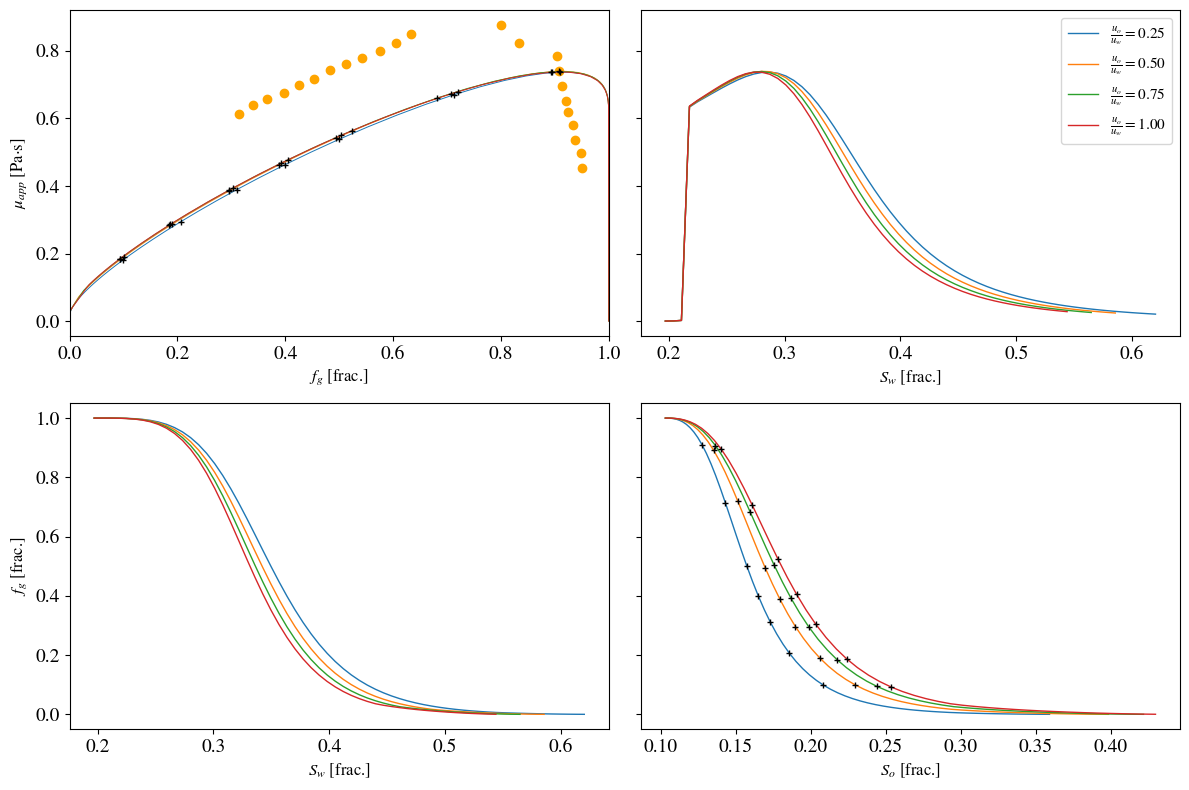

In [ ]:
noise_position = 0.0
noise_observation = 0.00
sz = 100

fg_ids = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9]
wo_rels = [0.25, 0.5, 0.75, 1]


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8), sharey='row')

ax1.plot(*zip(*fgmuax), 'o', color='orange')

fgmua = np.zeros((len(fg_ids)*len(wo_rels), 2))
for k, wo_rel in enumerate(wo_rels):
    sw = np.linspace(Swc , 1-Sgr-Sor , sz)

    swe = (sw - Swc) / (1 - Sgr - Sor - Swc)
    krw = krw0*swe**nw
    mob_w = krw/muw

    soe = ( wo_rel * muo * mob_w / kro0 ) ** ( 1./no )
    
    # Removing unfeasible values for saturated media (Sw + So + Sg = 1)
    unfeasible_mask = (soe < 1) & (swe + soe < 1)
    soe = soe[unfeasible_mask]
    sw = sw[unfeasible_mask]
    swe = swe[unfeasible_mask]
    krw = krw[unfeasible_mask]
    mob_w = mob_w[unfeasible_mask]

    so = Sor + soe * (1 - Swc - Sgr - Sor)

    sge = 1-swe-soe
    sg = Sgr + sge * (1 - Swc - Sgr - Sor)

    kro, krg = kro0*soe**no, krg0*sge**ng
    mob_o, mob_g = kro/muo, krg/mug

    muapp = muapp_approx(mob_w, mob_g, mob_o, sw, so, real)

    Fo = vfoil(so, fmoil, floil, epoil)
    Fw = 0.5 + np.arctan( sfbet * (sw - sfdry) ) / np.pi

    Nca = muapp * ut / sigma
    Fs = (fmcap / Nca)**epcap
    Fs[fmcap > Nca] = 1.0

    mrf = 1 + fmmob * Fw * Fo # * Fs
    mob_t = mob_w + mob_o + mob_g/mrf
    fg = (mob_g / mrf) / mob_t
    muapp = 1 / mob_t

    # find fgs closest to fg_ids + noise
    fg_ids_noisy = fg_ids + np.random.normal(0, noise_position, len(fg_ids))

    fg_idx = [np.nanargmin(np.abs(fg - fg_id)) for fg_id in fg_ids_noisy]
    fgmua[k*len(fg_ids):(k+1)*len(fg_ids), 0] = fg[fg_idx]
    fgmua[k*len(fg_ids):(k+1)*len(fg_ids), 1] = muapp[fg_idx]

    ax1.plot(fg, muapp, label=rf'$\frac{{u_o}}{{u_w}}={wo_rel:.2f}$', lw=0.7)
    ax2.plot(sw, muapp, label=rf'$\frac{{u_o}}{{u_w}}={wo_rel:.2f}$', lw=1)
    ax3.plot(sw, fg, label=rf'$\frac{{u_o}}{{u_w}}={wo_rel:.2f}$', lw=1)
    ax4.plot(so, fg, label=rf'$\frac{{u_o}}{{u_w}}={wo_rel:.2f}$', lw=1)

ax1.set_xlim(0, 1)

ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)
ax4.tick_params(axis='both', which='major', labelsize=14)


fgmua[:, 1] += np.random.normal(0, noise_observation, fgmua[:, 1].shape)
ax1.plot(fgmua[:, 0], fgmua[:, 1], '+', color='black', markersize=5)

wo_relss = np.repeat(wo_rels, len(fg_ids))
so_fgmua = ((muo * (1-fgmua[:, 0])) / (kro0 * fgmua[:, 1] * (1+1/wo_relss) ))**(1/no) * (1 - Swc - Sgr - Sor) + Sor
ax4.plot(so_fgmua, fgmua[:, 0], '+', color='black', markersize=5)

ax1.set_ylabel('$\mu_{app}$ [Pa$\cdot$s]', fontsize=12)
ax3.set_ylabel(r'$f_g$ [frac.]', fontsize=12)

ax1.set_xlabel(r'$f_g$ [frac.]', fontsize=12)
ax2.set_xlabel(r'$S_w$ [frac.]', fontsize=12)
ax3.set_xlabel(r'$S_w$ [frac.]', fontsize=12)
ax4.set_xlabel(r'$S_o$ [frac.]', fontsize=12)

# ax1.legend(loc='upper left', fontsize=11)
ax2.legend(loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()

Notice that the region $0.4 < f_g < 0.9$ has almost the same value for $S_w$. It would be a problem for the parameters identifiability using these points. It was confirmed by tests, and now we will try points outside this region. 

All of the inverse problem resolution is based on the $S_w$ values that rules the other saturations.

In [7]:

bounds = {
    "sfbet": (1, 10_000),
    "sfdry": (Swc, 1-Sgr-Sor),
    "floil": (Sor, 1-Swc-Sgr),
    "fmoil": (Sor, 1-Swc-Sgr),
    "epoil": (0.1, 10),
    # "fmcap": (1e-9, 1e-2),
    "epcap": (0.1, 10),
    "fmmob": (10, 1_000_000)
}

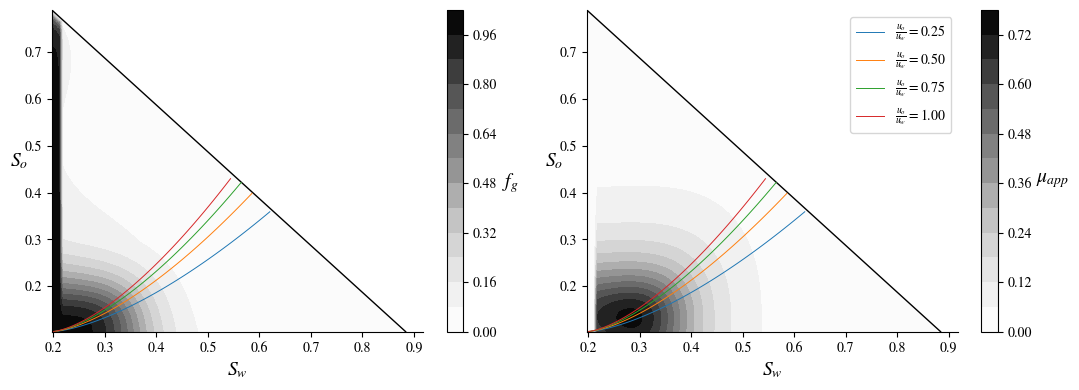

In [9]:
swx = np.linspace(Swc, 1 - Sgr - Sor, 100)
sox = np.linspace(Sor, 1 - Swc - Sgr, 100)
sw, so = np.meshgrid(swx, sox)

swe = (sw - Swc) / (1 - Swc - Sgr - Sor)
soe = (so - Sor) / (1 - Swc - Sgr - Sor)

sge = np.clip(1 - swe - soe, 0, 1)
sg = Sgr + sge * (1 - Swc - Sgr - Sor)

krw = krw0 * swe**nw
kro = kro0 * soe**no
krg = krg0 * sge**ng

mob_w = (krw / muw)
mob_o = (kro / muo)
mob_g = (krg / mug)

Fw = 0.5 + np.arctan(sfbet * (sw - sfdry)) / np.pi

# muapp = muapp_approx(mob_w, mob_g, mob_o, sw, so, real)
# Nca = muapp * ut / sigma
# Fs = (fmcap / Nca)**epcap

Fo = vfoil(so, fmoil, floil, epoil)
mrf = 1 + fmmob * Fw * Fo

mob_t = mob_w + mob_o + mob_g / mrf
fg = (mob_g / mrf) / mob_t
muapp = 1 / mob_t

mask = so + sw < 1 - Sgr

sw = sw[mask]
so = so[mask]
fg = fg[mask]
muapp = muapp[mask]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

contour = ax1.tricontourf(sw, so, fg, levels=12, cmap='Greys')
cbar = plt.colorbar(contour)
cbar.set_label('$f_g$', fontsize=14, rotation=0, labelpad=10)
ax1.set_xlabel(r'$S_w$', fontsize=14)
ax1.set_ylabel(r'$S_o$', fontsize=14, rotation=0)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

contour = ax2.tricontourf(sw, so, muapp, levels=12, cmap='Greys')
cbar = plt.colorbar(contour)
cbar.set_label('$\mu_{app}$', fontsize=14, rotation=0, labelpad=15)
ax2.set_xlabel(r'$S_w$', fontsize=14)
ax2.set_ylabel(r'$S_o$', fontsize=14, rotation=0)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.plot(swx, 1 - Sgr - swx, color='black', lw=1)
ax2.plot(swx, 1 - Sgr - swx, color='black', lw=1)

for wo_rel in [0.25, 0.5, 0.75, 1]:
    swxx = np.linspace(Swc, 1 - Sgr - Sor, 100)
    swex = (swx - Swc) / (1 - Sgr - Sor - Swc)
    krwx = krw0*swex**nw
    mob_wx = krwx/muw
    soex = ( muo * mob_wx * wo_rel / kro0 ) ** ( 1./no )
    soxx = Sor + soex * (1 - Swc - Sgr - Sor)

    mask_so = soex > 1
    mask_saturated = soxx + swxx > 1 - Sgr

    soxx = soxx[~mask_so & ~mask_saturated]
    swxx = swxx[~mask_so & ~mask_saturated]


    # plot the line
    ax1.plot(swxx, soxx, '-', lw=0.7, label=rf'$\frac{{u_o}}{{u_w}}={wo_rel:.2f}$')
    ax2.plot(swxx, soxx, '-', lw=0.7, label=rf'$\frac{{u_o}}{{u_w}}={wo_rel:.2f}$')

plt.legend()

plt.tight_layout()
plt.show()

In [10]:
def inverse_uq(fg, muapp, rv_params, wo_rel) -> tuple:

    fmmob = rv_params["fmmob"]
    
    sfbet = rv_params["sfbet"]
    sfdry = rv_params["sfdry"]

    fmoil = rv_params["fmoil"]
    floil = rv_params["floil"]
    epoil = rv_params["epoil"]
    
    # fmcap = rv_params["fmcap"]
    # epcap = rv_params["epcap"]

    # if wo_rel is a float, repeat it to match the size of fg
    if isinstance(wo_rel, float):
        wo_rel = np.repeat(wo_rel, len(fg))
    
    swe = ( ((1-fg) / (1+wo_rel)) * muw/(muapp*krw0) )**(1/nw)
    swe = np.clip(swe, 0, 1)
    sw = (1 - Swc - Sgr - Sor) * swe + Swc

    soe = np.array([
        ( ((1-fgx) / (1+1/wo_relx)) * muo / (muappx * kro0) )**(1/no) 
        if wo_relx != 0 else 0          # necessary to avoid the division by zero
        for fgx, muappx, wo_relx in zip(fg, muapp, wo_rel)
    ])
    soe = np.clip(soe, 0, 1)
    so = (1 - Swc - Sgr - Sor) * soe + Sor

    sge = np.clip(1-swe-soe, 0, 1)
    sg = Sgr + sge * (1 - Swc - Sgr - Sor)

    krw = krw0 * swe**nw
    kro = kro0 * soe**no
    krg = krg0 * sge**ng

    mob_w = (krw / muw)
    mob_o = (kro / muo)
    mob_g = (krg / mug)

    Fw = 0.5 + np.arctan(sfbet * (sw - sfdry) ) / np.pi
    Fo = Fo = ((so <= fmoil) * (  (fmoil - so)/(fmoil - floil) ) ** (so >= floil) )**epoil
    Fo[so > fmoil] = 0.0
    Fo[so < floil] = 1.0

    # muapp = muapp_approx(mob_w, mob_g, mob_o, sw, so, real)
    # Nca = muapp * ut / sigma
    # Fs = np.clip((fmcap / Nca)**epcap, 0, 1)

    mrf = 1 + fmmob * Fw * Fo
    mob_t = mob_w + mob_o + mob_g/mrf
    fg = (mob_g / mrf) / mob_t
    muapp = 1 / mob_t

    return sw, so, sg, fg, muapp

In [11]:
import lmfit

params = lmfit.Parameters()

# fmoil-floil > 0 
params.add('delta', min=0.01, max=1, vary=True)
params.add('floil', min=Sor, max=1-Swc-Sgr, vary=True)
params.add('fmoil', expr='floil + delta', min=Sor, max=1-Swc-Sgr, vary=True)

# params.add('floil', value=real['floil'], vary=False)
# params.add('fmoil', value=real['fmoil'], vary=False)
# params.add('epoil', value=real['epoil'], vary=False)

# params.add('epcap', value=real['epcap'], vary=False)
# params.add('fmcap', value=real['fmcap'], vary=False)

for k, (kmin, kmax) in bounds.items():
    if k == 'floil' or k == 'fmoil' or k == 'fmcap':
        continue
    params.add(k, min=kmin, max=kmax, vary=True)

fg_obs      = fgmuax[:, 0]
mu_app_obs  = fgmuax[:, 1]

resid_func = lambda pars: np.sum((mu_app_obs - inverse_uq(fg_obs, mu_app_obs, pars, 1/4)[4])**2)
mini = lmfit.Minimizer( resid_func, params )
optim = mini.minimize(method='differential_evolution')
lmfit.report_fit(optim, min_correl=0.4)

print('\n\nParameter & Ground truth & Estimated & Relative Error \\\\')
for k, v in real.items():
    if k not in list(params.keys()):
        continue
    print(f'{k} & {v:.4f} & {optim.params[k].value:.4f} & {100*abs(v - optim.params[k].value)/v:.2f}% \\\\')

[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 5419
    # data points      = 1
    # variables        = 7
    chi-square         = 0.00179207
    reduced chi-square = 0.00179207
    Akaike info crit   = 7.67561518
    Bayesian info crit = -6.32438482
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    delta:  0.84871227 (init = 0.01)
    floil:  0.72591798 (init = 0.103)
    fmoil:  0.79000000 == 'floil + delta'
    sfbet:  170.320743 (init = 1)
    sfdry:  0.28533257 (init = 0.197)
    epoil:  7.34682923 (init = 0.1)
    epcap:  8.42711450 (init = 0.1)
    fmmob:  74280.0535 (init = 10)


Parameter & Ground truth & Estimated & Relative Error \\
fmmob & 50000.0000 & 74280.0535 & 48.56% \\
sfdry & 0.215

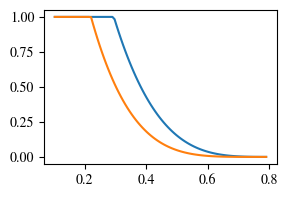

In [12]:
# fmoil & 0.8230 & 0.7900 & 4.01% \\
# floil & 0.2950 & 0.2207 & 25.20% \\
# epoil & 3.8270 & 4.5030 & 17.66% \\

plt.figure(figsize=(3, 2))

fmoil = 0.8230
floil = 0.2950
epoil = 3.8270
Fo = ((sox <= fmoil) * (  (fmoil - sox)/(fmoil - floil) ) ** (sox >= floil) )**epoil

plt.plot(sox, Fo)

fmoil = 0.7900
floil = 0.2207
epoil = 4.5030
Fo = ((sox <= fmoil) * (  (fmoil - sox)/(fmoil - floil) ) ** (sox >= floil) )**epoil

plt.plot(sox, Fo)

In [17]:
optim_params = {k: optim.params[k].value for k in bounds.keys()}

def plot_triph(rv_params, wo_rel):

    sfbet = rv_params["sfbet"]
    sfdry = rv_params["sfdry"]
    fmoil = rv_params["fmoil"]
    floil = rv_params["floil"]
    epoil = rv_params["epoil"]
    fmmob = rv_params["fmmob"]
    fmcap = fmcap
    epcap = rv_params["epcap"]
    
    swx = np.linspace( Swc, 1-Sgr-Sor, 1_000)
    swe = (swx - Swc)/ (1. - Swc - Sgr - Sor)
    krw = krw0 * swe**nw
    mob_w = krw/muw

    soe = np.clip(( muo * mob_w * wo_rel / kro0 ) ** ( 1/no ), 0, 1)
    sox = Sor + soe * (1 - Swc - Sgr - Sor)

    sge = np.clip(1-swe-soe, 0, 1)

    kro, krg = kro0*soe**no, krg0*sge**ng
    mob_o, mob_g = kro/muo, krg/mug
    
    Fw = 0.5 + np.arctan(sfbet * (swx - sfdry) ) / np.pi
    
    Fo = ((fmoil - sox)/(fmoil - floil))**epoil
    Fo[sox > fmoil] = 0
    Fo[sox < floil] = 1

    muapp = muapp_approx(mob_w, mob_g, mob_o, swx, sox, rv_params)

    Nca = muapp * ut / sigma
    Fs = np.clip((fmcap / Nca)**epcap, 0, 1)
    mrf = 1 + fmmob * Fw * Fo * Fs

    mob_t = mob_w + mob_o + mob_g/mrf
    fgx = (mob_g / mrf) / mob_t
    muapp = 1 / mob_t


    # plt.plot(fgx, Fs)
    # plt.show()
    # plt.plot(fgx, Fo)
    # plt.show()
    
    return fgx, muapp

plt.figure(figsize=(7, 4))

fgx, muapp = plot_triph(optim_params, 1/4)
plt.plot(fgx, muapp, '--', label=rf'$\frac{{u_o}}{{u_w}}={1/4:.2f}$', lw=0.7)

plt.plot(fgmua[:, 0], fgmua[:, 1], '+', color='black', markersize=5)

plt.xlim(0, 1)
plt.legend(loc='upper left', fontsize=11)
plt.ylabel('$\mu_{app}$ [Pa$\cdot$s]', fontsize=12)
plt.xlabel(r'$f_g$ [frac.]', fontsize=12)

plt.show()


UnboundLocalError: local variable 'fmcap' referenced before assignment

<Figure size 700x400 with 0 Axes>

https://onepetro.org/SJ/article/24/01/140/206958/Experimental-Investigation-of-the-Effect-of-Oil-on

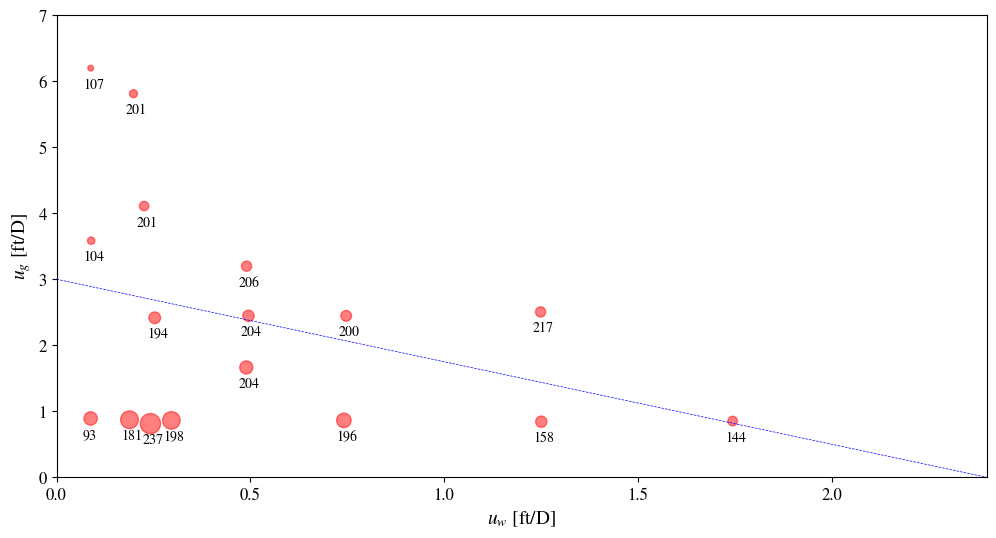

In [17]:
wo_rel = 1/4
ut_fd = 3

uwug = np.array([
    [0.08793709559635210, 0.8910891089108910,  93],
    [0.18826995907137890, 0.8712871287128712, 181],
    [0.24227026476232538, 0.8118811881188117, 237],
    [0.29632661379345480, 0.8613861386138622, 198],
    [0.74143810607475850, 0.8613861386138622, 196],
    [1.25086187864069440, 0.8415841584158423, 158],
    [1.74486354295807010, 0.8514851485148514, 144],
    [1.24914491449144950, 2.5049504950495054, 217],
    [0.74739907953059460, 2.4455445544554450, 200],
    [0.48970670651970870, 1.6633663366336630, 204],
    [0.49525499719783317, 2.4455445544554450, 204],
    [0.49049640813137940, 3.1980198019801980, 206],
    [0.25338722551500437, 2.4158415841584160, 194],
    [0.08932289455360631, 3.5841584158415842, 104],
    [0.22595655791994296, 4.1089108910891090, 201],
    [0.19853098517398915, 5.8118811881188130, 201],
    [0.08809503591868623, 6.1980198019801980, 107]
])

Uw = uwug[:, 0]
Ug = uwug[:, 1]
dP = uwug[:, 2]

marker_size = dP/((1 + wo_rel)*Uw + Ug) # dP/uT analog to the maximum grad p but for multiple total velocities

fg_2D = Ug/((1 + wo_rel)*Uw + Ug)


plt.figure(figsize=(12, 6))
plt.scatter(uwug[:,0], uwug[:,1], c='r', marker='o', s=marker_size, alpha=0.5)
for i, txt in enumerate(uwug[:,2]):
    plt.annotate(int(txt), (uwug[i,0]-0.02, uwug[i,1]-0.3))

x = np.linspace(0, 12/5, 100)
y = ut_fd - (1 + wo_rel)*x
plt.plot(x, y, '--b', zorder=9, lw=0.5)

plt.xlim(0, 12/5)
plt.ylim(0, 7)

plt.xlabel(r'$u_w$ [ft/D]', fontsize=14)
plt.ylabel(r'$u_g$ [ft/D]', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

If there were a commited error about the observation it could be used to weigh the influence of the points in selecting the transition foam quality.

A kinda of approximation to make the dataset non-dependent on $u_T$ is proposed here.

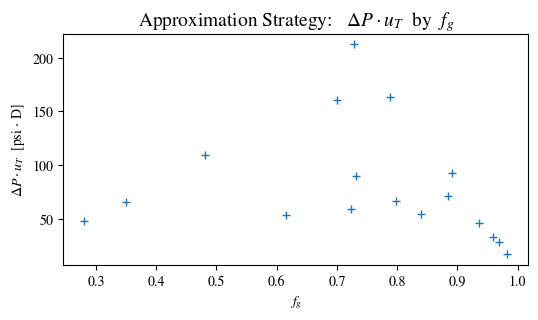

In [18]:
plt.figure(figsize=(6, 3))
plt.plot(fg_2D, marker_size, '+')
plt.xlabel(r'$f_g$')
plt.ylabel(r'$\Delta P \cdot u_T$  [psi $\cdot$ D]')
plt.title(r'Approximation Strategy:   $\Delta P \cdot u_T$  by  $f_g$', fontsize=14)
plt.show()

[905.83553865  97.7000251 ]


/tmp/ipykernel_15654/3852860818.py:11: RuntimeWarning: invalid value encountered in divide
  fg = ug / ((1 + wo_rel)*uw + ug)


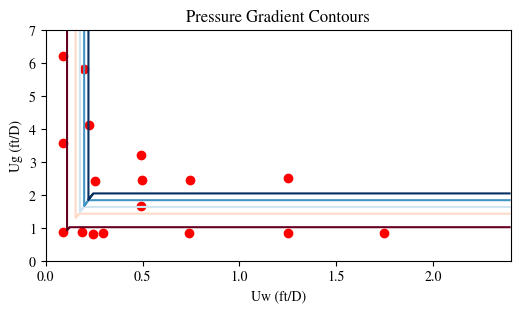

In [19]:
def approx_dp( uwug, a1, a2, wo_rel=1/4, fg_star=0.87):
    """
    A function of two variables (x, y) dependent on only 1 parameter until 
    it reaches a certain x/(x+y) value. After that, it becomes dependent on y only.
    """
    

    uw = uwug[:,0]
    ug = uwug[:,1]

    fg = ug / ((1 + wo_rel)*uw + ug)

    dp = a1 * uw 
    dp[fg < fg_star] = a2 * ug[fg < fg_star]  # low quality region, dependent on ug only

    return dp   
    

popt, pcov = opt.curve_fit(approx_dp, uwug, uwug[:,2], p0=[1, 1])

print(popt)

plt.figure(figsize=(6, 3))
plt.plot(uwug[:,0], uwug[:,1], 'o', color='red')

uwxx = np.linspace(0, 12/5, 1000)
ugxx = np.linspace(0, 7, 1000)

uwxx, ugxx = np.meshgrid(uwxx, ugxx)

dp = approx_dp(np.array([uwxx.ravel(), ugxx.ravel()]).T, *popt)
dp = dp.reshape(uwxx.shape)

plt.contour(uwxx, ugxx, dp, levels=[100, 140, 160, 180, 200], cmap='RdBu')
# plt.clabel(contour, inline=True, fontsize=8)

# plt.colorbar(contour)
plt.xlabel('Uw (ft/D)')
plt.ylabel('Ug (ft/D)')
plt.title('Pressure Gradient Contours')

plt.show()

In [20]:
# given a fg and a uT, find the dp
def dp_approx(fg, ut, popt, wo_rel=1/4):
    """
    Approximates the pressure gradient given a foam_quality (fg) and a total velocity (ut).
    """

    if isinstance(fg, float):
        fg = np.array([fg])

    ug = fg * ut
    uw = ((1 - fg) / (1 + wo_rel)) * ut
    
    # return approx_dp(np.array([uw, ug]).reshape(1, -1), *popt)[0]

    dp_array = np.zeros(len(uw))
    for i, (uwx, ugx) in enumerate(zip(uw, ug)):
        dp_array[i] = approx_dp(np.array([uwx, ugx]).reshape(1, -1), *popt)[0]

    return dp_array

fg = 0.95
ut = 3
dp_approx(np.array([.1, .2]), ut, popt)


array([29.31000753, 58.62001506])

In [316]:
def fshear2_residual(fg, mob_w, mob_g, mob_o, sw, so, params):

    Nca = abs_perm * dp_approx(fg, ut=3, popt=popt) / sigma
    
    Fw = 0.5 + np.arctan(params['sfbet'] * (sw - params['sfdry']))/np.pi
    Fo = foil(so, params['fmoil'], params['floil'], params['epoil'])
    if Nca < params["fmcap"]:
        Fs = 1.0
    Fs = (params["fmcap"] / Nca) ** params["epcap"]
    
    mrf = 1.0 + params["fmmob"] * Fw * Fo * Fs
    mob_t = mob_w + mob_o + (mob_g/mrf)

    return np.abs(fg - ((mob_g/mrf)/mob_t))

def fg_approx(mob_w, mob_g, mob_o, sw, so, params):
    results = []
    for mw, mg, mo, s_w, s_o in zip(mob_w, mob_g, mob_o, sw, so):
        result = opt.minimize_scalar(
            fshear2_residual,
            args=(mw, mg, mo, s_w, s_o, params),
            method='bounded',
            bounds=(0, 1)
        )
        results.append(result.x)

    return np.array(results)

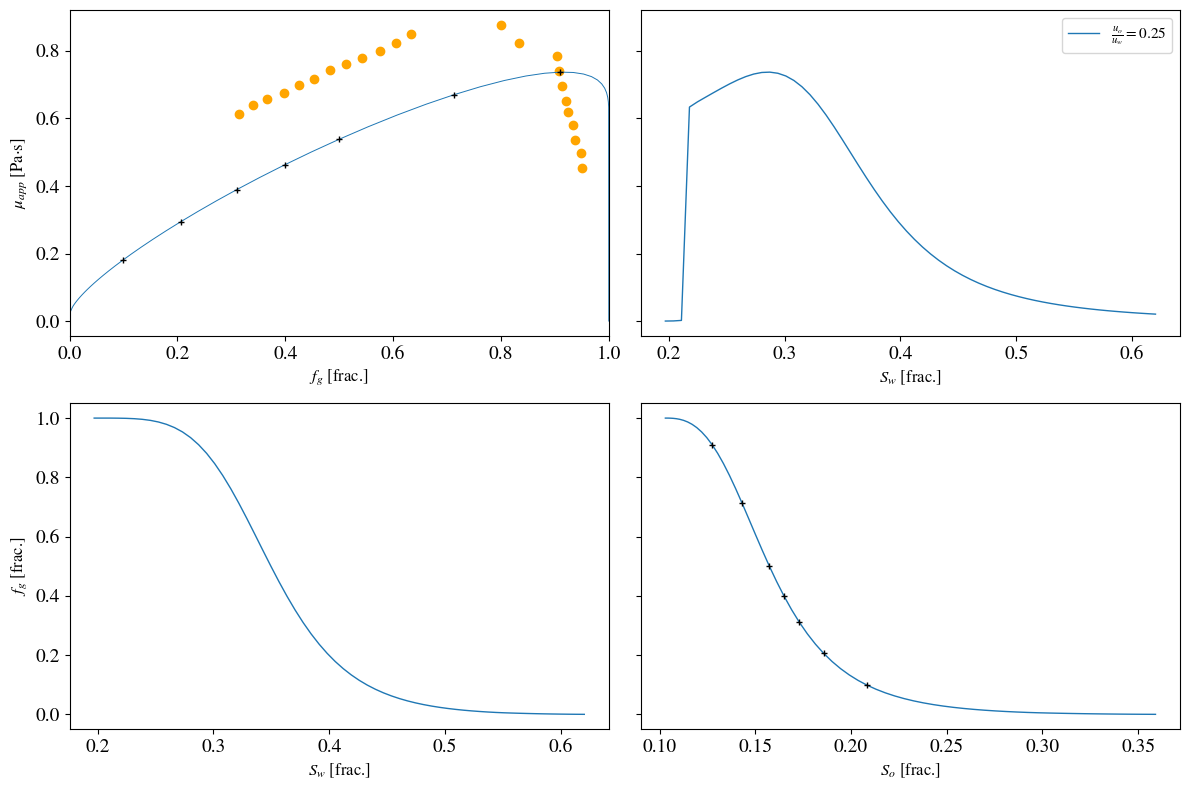

In [317]:
noise_position = 0.0
noise_observation = 0.00
sz = 100

fg_ids = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9]
wo_rels = [0.25]


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8), sharey='row')

ax1.plot(*zip(*fgmuax), 'o', color='orange')

fgmua = np.zeros((len(fg_ids)*len(wo_rels), 2))
for k, wo_rel in enumerate(wo_rels):
    sw = np.linspace(Swc , 1-Sgr-Sor , sz)

    swe = (sw - Swc) / (1 - Sgr - Sor - Swc)
    krw = krw0*swe**nw
    mob_w = krw/muw

    soe = ( wo_rel * muo * mob_w / kro0 ) ** ( 1./no )
    
    # Removing unfeasible values for saturated media (Sw + So + Sg = 1)
    unfeasible_mask = (soe < 1) & (swe + soe < 1)
    soe = soe[unfeasible_mask]
    sw = sw[unfeasible_mask]
    swe = swe[unfeasible_mask]
    krw = krw[unfeasible_mask]
    mob_w = mob_w[unfeasible_mask]

    so = Sor + soe * (1 - Swc - Sgr - Sor)

    sge = 1-swe-soe
    sg = Sgr + sge * (1 - Swc - Sgr - Sor)

    kro, krg = kro0*soe**no, krg0*sge**ng
    mob_o, mob_g = kro/muo, krg/mug

    fg = fg_approx(mob_w, mob_g, mob_o, sw, so, real)

    Fo = vfoil(so, fmoil, floil, epoil)
    Fw = 0.5 + np.arctan( sfbet * (sw - sfdry) ) / np.pi

    Nca = abs_perm * dp_approx(fg, ut=3, popt=popt) / sigma
    Fs = (fmcap / Nca)**epcap
    Fs[fmcap > Nca] = 1.0

    mrf = 1 + fmmob * Fw * Fo * Fs
    mob_t = mob_w + mob_o + mob_g/mrf
    fg = (mob_g / mrf) / mob_t
    muapp = 1 / mob_t

    # find fgs closest to fg_ids + noise
    fg_ids_noisy = fg_ids + np.random.normal(0, noise_position, len(fg_ids))

    fg_idx = [np.nanargmin(np.abs(fg - fg_id)) for fg_id in fg_ids_noisy]
    fgmua[k*len(fg_ids):(k+1)*len(fg_ids), 0] = fg[fg_idx]
    fgmua[k*len(fg_ids):(k+1)*len(fg_ids), 1] = muapp[fg_idx]

    ax1.plot(fg, muapp, label=rf'$\frac{{u_o}}{{u_w}}={wo_rel:.2f}$', lw=0.7)
    ax2.plot(sw, muapp, label=rf'$\frac{{u_o}}{{u_w}}={wo_rel:.2f}$', lw=1)
    ax3.plot(sw, fg, label=rf'$\frac{{u_o}}{{u_w}}={wo_rel:.2f}$', lw=1)
    ax4.plot(so, fg, label=rf'$\frac{{u_o}}{{u_w}}={wo_rel:.2f}$', lw=1)

ax1.set_xlim(0, 1)

ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)
ax4.tick_params(axis='both', which='major', labelsize=14)


fgmua[:, 1] += np.random.normal(0, noise_observation, fgmua[:, 1].shape)
ax1.plot(fgmua[:, 0], fgmua[:, 1], '+', color='black', markersize=5)

wo_relss = np.repeat(wo_rels, len(fg_ids))
so_fgmua = ((muo * (1-fgmua[:, 0])) / (kro0 * fgmua[:, 1] * (1+1/wo_relss) ))**(1/no) * (1 - Swc - Sgr - Sor) + Sor
ax4.plot(so_fgmua, fgmua[:, 0], '+', color='black', markersize=5)

ax1.set_ylabel('$\mu_{app}$ [Pa$\cdot$s]', fontsize=12)
ax3.set_ylabel(r'$f_g$ [frac.]', fontsize=12)

ax1.set_xlabel(r'$f_g$ [frac.]', fontsize=12)
ax2.set_xlabel(r'$S_w$ [frac.]', fontsize=12)
ax3.set_xlabel(r'$S_w$ [frac.]', fontsize=12)
ax4.set_xlabel(r'$S_o$ [frac.]', fontsize=12)

# ax1.legend(loc='upper left', fontsize=11)
ax2.legend(loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()